- **Name:** Mhar Andrei Consebido Macapallag
- **Y&S:** BSCS 3B IS
- **Course:** CSST 102 | Basic Machine Learning
- **Topic:** Topic 2: Supervised Learning Fundamentals
- **Due date:** N/A

# **Machine Problem #2: Predicting House Prices with Multiple Regression**

Dataset Overview:
   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05

Missing Data:
Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64

Summary Statistics:
       Size (sqft)     Bedrooms          Age  Proximity to Downtown (miles)  \
count  1000.000000  1000.000000  1000.000000                    1000.000000   
mean   2429.857000     2.993000    48.335000                      15.289063   
std     929.914229     1.424423    29.203384                       8.54

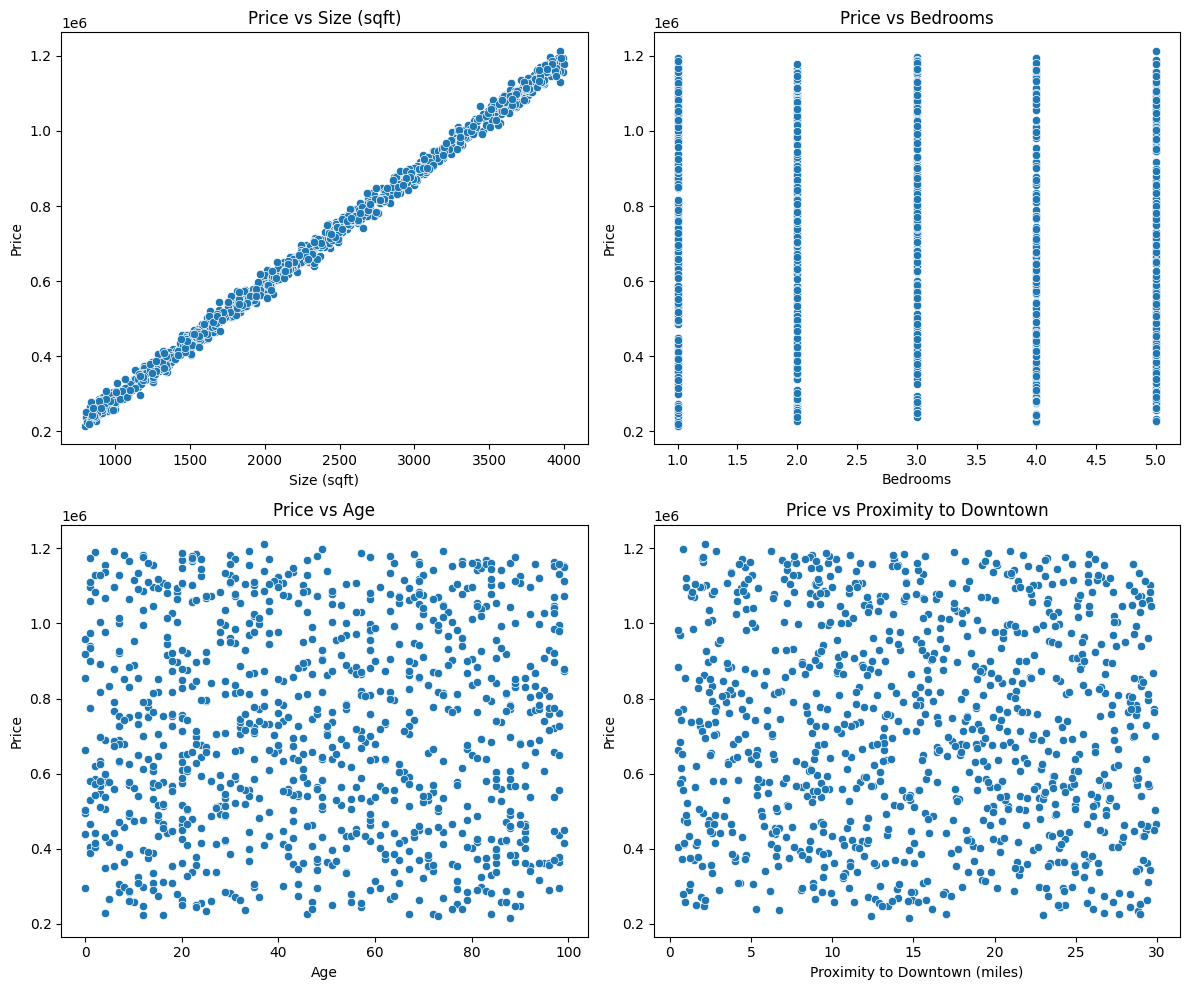

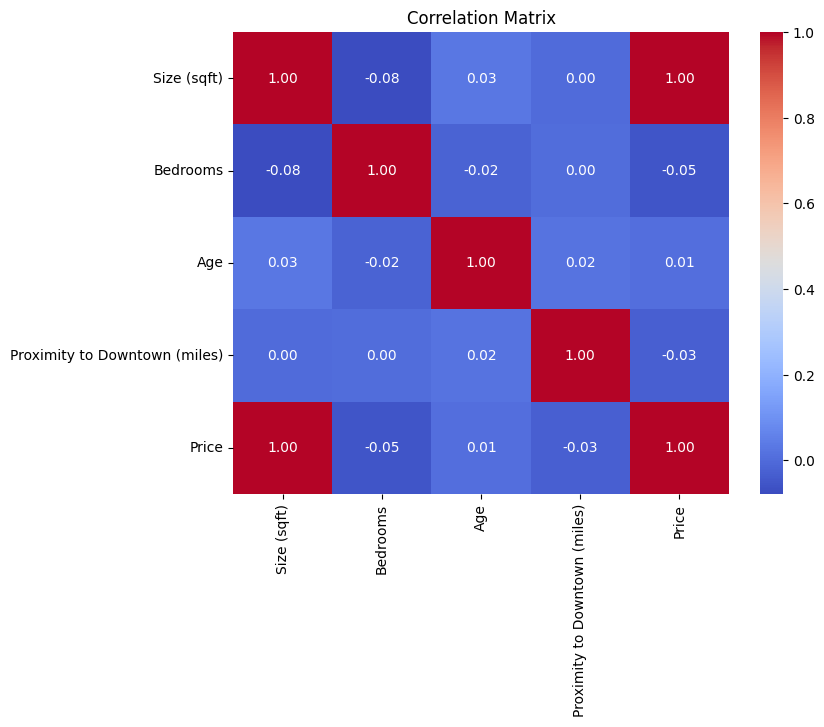

In [1]:
#@title # **1. Data Exploration and Visualization**
#@markdown # **Explanation:**
#@markdown - **Dataset Overview:** The **`head()`** function shows the first few rows of the dataset to understand its structure.
#@markdown - **Missing Data:** The **`isnull().sum()`** function checks for any missing data in each column. This step is critical because missing data can skew our model.
#@markdown - **Summary Statistics:** The **`describe()`** function provides key statistics (mean, standard deviation, min, max, etc.) for numerical columns, allowing us to get a sense of the data’s range and central tendencies.
#@markdown - **Scatter Plots:** Scatter plots visualize the relationships between each feature (e.g., size, bedrooms) and the target variable (price). Strong trends may indicate useful predictors.
#@markdown - **Correlation Matrix:** This matrix shows how strongly variables are correlated with one another. Values range from -1 to 1, where 1 indicates a strong positive correlation and -1 indicates a strong negative correlation.


# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'datasets_house_prices.csv'  # Replace with actual file path
house_data = pd.read_csv(file_path)

# 1.1 Check first few rows of the dataset
print("Dataset Overview:")
print(house_data.head())

# 1.2 Check for missing data
print("\nMissing Data:")
print(house_data.isnull().sum())

# 1.2.1 Fixes
house_data.fillna(house_data.mean(), inplace=True)

Q1 = house_data.quantile(0.25)
Q3 = house_data.quantile(0.75)
IQR = Q3 - Q1
house_data = house_data[~((house_data < (Q1 - 1.5 * IQR)) | (house_data > (Q3 + 1.5 * IQR))).any(axis=1)]


# 1.3 Descriptive statistics
print("\nSummary Statistics:")
print(house_data.describe())

# 1.4 Visualizations

# Scatter plots for each feature against Price
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Size (sqft)', y='Price', data=house_data)
plt.title('Price vs Size (sqft)')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Bedrooms', y='Price', data=house_data)
plt.title('Price vs Bedrooms')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Age', y='Price', data=house_data)
plt.title('Price vs Age')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Proximity to Downtown (miles)', y='Price', data=house_data)
plt.title('Price vs Proximity to Downtown')

plt.tight_layout()
plt.show()

# Correlation matrix to analyze relationships between features
plt.figure(figsize=(8, 6))
corr_matrix = house_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()




In [2]:
#@title #**2. Data Preprocessing**
#@markdown #**Explanation:**
#@markdown - **Handling Missing Data:** Since I already checked for missing data and found none, this step is complete.
#@markdown - **Separating Features and Target Variable:** We separate the dataset into X (features) and y (target variable).
#@markdown  - **X** includes all the features we will use to predict house prices: Size, Bedrooms, Age, and Proximity to Downtown.
#@markdown  - **y** is the house price, which we aim to predict.
#@markdown - **Train-Test Split:** We use the **`train_test_split()`** function to split the dataset into training and testing sets. The model will be trained on 70% of the data and tested on 30%.
#@markdown - **Standardization:** We use **`StandardScaler()`** from the **`sklearn`** library to standardize the features. Standardization rescales the data so that each feature has a mean of 0 and a standard deviation of 1, ensuring that all features are on a similar scale.
#@markdown  - **X_train_scaled** is the standardized version of the training data.
#@markdown  - **X_test_scaled** is the standardized version of the testing data, but we only transform it (not fit), ensuring that the model is tested on unseen data.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 2.2 Separate features (X) and target variable (y)
X = house_data[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]
y = house_data['Price']

# 2.3 Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2.4 Normalize or standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)        # Only transform the test data

# Output the transformed data (optional, to understand how it looks)
print("First 5 rows of the standardized training data:")
print(pd.DataFrame(X_train_scaled, columns=X.columns).head())


First 5 rows of the standardized training data:
   Size (sqft)  Bedrooms       Age  Proximity to Downtown (miles)
0     1.677660 -1.456677  1.737153                       0.045620
1     1.254519  1.403559 -0.577340                      -1.037343
2    -0.817483 -0.741618 -1.130055                      -1.465520
3    -1.143632 -0.026559  0.113553                      -0.051020
4     0.467926 -1.456677  0.389911                       1.465485


In [3]:
#@title #**3. Model Development**
#@markdown # **Explanation:**
#@markdown - **Building the Regression Model:** We use the LinearRegression() class from **`scikit-learn`** to create the multiple regression model. Linear regression is ideal for predicting a continuous variable (like house prices) based on one or more features.
#@markdown - **Training the Model:** We fit the model to the training data (**`X_train_scaled`** and **`y_train`**). This allows the model to learn the relationship between the features (size, bedrooms, etc.) and the target variable (price).
#@markdown - **Feature Selection (Optional):** To check the significance of each feature, we use OLS (Ordinary Least Squares) regression from the **`statsmodels`** library. The **`summary()`** function provides important metrics like p-values, which help determine if a feature significantly contributes to the model. Features with high p-values might not be significant predictors.
#@markdown  - **p-values:** If a p-value is less than 0.05, we consider that feature statistically significant in predicting the house price.
#@markdown  -  step is optional, but it's useful if we want to remove features that don't contribute much to the prediction model.
#@markdown - **Model Coefficients and Intercept:** After training the model, we extract the coefficients and the intercept of the regression equation:
#@markdown  - **Coefficients:** These tell us how much the target variable (house price) is expected to change for each one-unit change in the feature, assuming all other features are held constant.
#@markdown  - **Intercept:** This is the predicted price when all the features are zero.

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# 3.1 Build the regression model
model = LinearRegression()

# 3.2 Train the model using the training data
model.fit(X_train_scaled, y_train)

# 3.3 Feature selection using statistical analysis (optional)
# Add a constant to the features for the intercept
X_train_const = sm.add_constant(X_train_scaled)
ols_model = sm.OLS(y_train, X_train_const).fit()

# Print the summary of the OLS regression
print(ols_model.summary())

# 3.4 Predict on the test set
y_pred = model.predict(X_test_scaled)

# Output the model coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.332e+05
Date:                Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                        00:01:40   Log-Likelihood:                -7452.2
No. Observations:                 700   AIC:                         1.491e+04
Df Residuals:                     695   BIC:                         1.494e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.092e+05    385.696   1838.693      0.0

Mean Squared Error (MSE): 100214724.63
R-squared: 1.00
Adjusted R-squared: 1.00


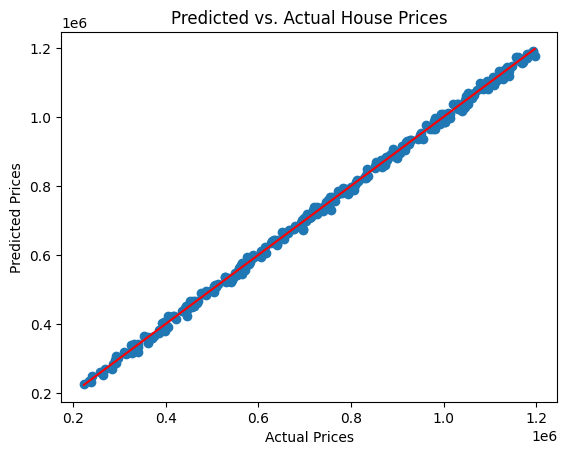

In [4]:
#@title #**4. Model Evaluation**
#@markdown #**Explanation:**
#@markdown - **Mean Squared Error (MSE):** **MSE** is a measure of how far the predictions are from the actual values, on average. The lower the MSE, the better the model is at predicting the target variable. (*Should be somewhere around between a couple of millions ~ billions in this case.*)
#@markdown  - **Formula:** $$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
#@markdown  - Where:
#@markdown    - $y_i$ is the actual value
#@markdown    - $\hat{y}_i$ is the predicted value
#@markdown  - A lower MSE indicates better performance. (*~Ms-Bs*)
#@markdown - **R-squared and adjusted R-squared:** **R-squared** is a measure of how well the independent variables (features) explain the variability of the dependent variable (house price). It ranges from 0 to 1, with higher values indicating better model performance.
#@markdown  - **R-squared Formula:** $$ R^2 = 1 - \frac{\text{Sum of Squared Residuals}}{\text{Total Sum of Squares}} $$
#@markdown - **Adjusted R-squared** adjusts the R-squared value by accounting for the number of features (predictors). It prevents overestimation of the model’s performance when adding irrelevant predictors.
#@markdown  - **Adjusted R-squared Formula:** $$ \text{Adjusted } R^2 = 1 - \left( \frac{1 - R^2}{n - p - 1} \right) \times (n - 1) $$
#@markdown  - Where:
#@markdown    - $ n $ is the number of data points
#@markdown    - $ p $ is the number of predictors
#@markdown  - A high adjusted R-squared indicates that the model explains a significant amount of variance in house prices, even when adjusting for the number of features.
#@markdown - **Predicted vs. Actual Prices Plot** The scatter plot shows the relationship between actual and predicted house prices. The closer the points are to the diagonal red line (which represents perfect predictions), the better the model is at predicting prices.
#@markdown  - If the points deviate far from the line, it means the model is struggling with some predictions.

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 4.1 Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# 4.2 Calculate R-squared and Adjusted R-squared
r_squared = r2_score(y_test, y_pred)
n = X_test_scaled.shape[0]  # Number of data points
p = X_test_scaled.shape[1]  # Number of predictors
adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))

print(f"R-squared: {r_squared:.2f}")
print(f"Adjusted R-squared: {adjusted_r_squared:.2f}")

# 4.3 Plot Predicted vs. Actual Prices
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for reference
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs. Actual House Prices")
plt.show()